## Loading Data in Python

In [1]:
import os
import pandas as pd
import numpy as np
import pickle
filename = 'load.csv'

In [2]:
os.getcwd()

'C:\\Users\\JM025575\\Python Practice\\Python Programming Course'

In [3]:
d3 = pd.read_csv(filename)

In [4]:
print(d3.dtypes)

A    float64
B    float64
C    float64
D    float64
E      int64
dtype: object


In [5]:
d3.head()

,A,B,C,D,E
0,1.276,21.400,63.957,216.204,528
1,1.002,21.950,61.697,204.484,514
2,1.114,22.454,63.522,205.608,514
3,1.133,22.494,61.590,206.565,501
4,0.845,21.654,63.729,201.289,532


## Prepare Data

In [6]:
file2 = 'Diabetes.csv'

In [7]:
df = pd.read_csv(file2)

In [8]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [10]:
#Dealing with null values
df = df.fillna(0) 
#or df.dropna

In [11]:
df2 = df[['Glucose', 'BMI', 'Age', 'Outcome']]

In [12]:
df2.head()

,Glucose,BMI,Age,Outcome
0,148,33.6,50,1
1,85,26.6,31,0
2,183,23.3,32,1
3,89,28.1,21,0
4,137,43.1,33,1


In [13]:
df2.describe()

,Glucose,BMI,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000
mean,120.894531,31.992578,33.240885,0.348958
std,31.972618,7.884160,11.760232,0.476951
min,0.000000,0.000000,21.000000,0.000000
25%,99.000000,27.300000,24.000000,0.000000
50%,117.000000,32.000000,29.000000,0.000000
75%,140.250000,36.600000,41.000000,1.000000
max,199.000000,67.100000,81.000000,1.000000


In [14]:
#working with '0' values, drop all True values where a column has a '0' value
df3 = df2.loc[~(df2[df2.columns[:-1]] == 0).any(axis=1)]

In [15]:
df3.describe()  #end up dropping 16 rows

,Glucose,BMI,Age,Outcome
count,752.000000,752.000000,752.000000,752.000000
mean,121.941489,32.454654,33.312500,0.351064
std,30.601198,6.928926,11.709395,0.477621
min,44.000000,18.200000,21.000000,0.000000
25%,99.750000,27.500000,24.000000,0.000000
50%,117.000000,32.300000,29.000000,0.000000
75%,141.000000,36.600000,41.000000,1.000000
max,199.000000,67.100000,81.000000,1.000000


In [16]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 752 entries, 0 to 767
Data columns (total 4 columns):
Glucose    752 non-null int64
BMI        752 non-null float64
Age        752 non-null int64
Outcome    752 non-null int64
dtypes: float64(1), int64(3)
memory usage: 29.4 KB


In [17]:
df3.groupby('Outcome').mean()

,Glucose,BMI,Age
Outcome,,,
0,110.825820,30.876434,31.309426
1,142.488636,35.371970,37.015152


In [18]:
df3.groupby('Outcome').agg({'Glucose': "mean", 'BMI': 'median', 'Age': 'sum'})

,Glucose,BMI,Age
Outcome,,,
0,110.825820,30.10,15279
1,142.488636,34.25,9772


In [19]:
df3.groupby('Outcome').agg(['mean', 'median']) #easy summary stats in one line of code

Glucose               BMI               Age       
               mean median       mean median       mean median
Outcome                                                       
0        110.825820  107.5  30.876434  30.10  31.309426     27
1        142.488636  140.5  35.371970  34.25  37.015152     36

In [20]:
#split data frome into 2 data frames
positive = df3.loc[df3['Outcome'] == 1]
negative = df3.loc[df3['Outcome'] == 0]
print(positive.shape, negative.shape)

(264, 4) (488, 4)


## Histograms

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [22]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [23]:
df.shape

(768, 9)

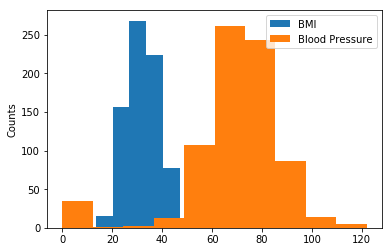

In [33]:
bins = np.linspace(min(df.BMI.min(), df.BloodPressure.min()), max(df.BMI.max(), df.BloodPressure.max(), 50))
plt.hist(df.BMI, label = 'BMI')
plt.hist(df.BloodPressure, label = 'Blood Pressure')
plt.legend()
plt.ylabel('Counts')
plt.show()

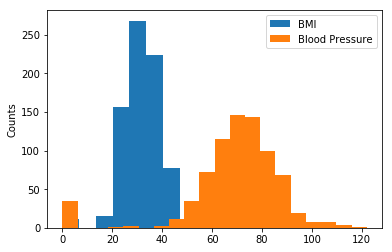

In [34]:
#bins = np.linspace(min(df.BMI.min(), df.BloodPressure.min()), max(df.BMI.max(), df.BloodPressure.max(), 50))
plt.hist(df.BMI, label = 'BMI', bins = 10)
plt.hist(df.BloodPressure, label = 'Blood Pressure', bins = 20)
plt.legend()
plt.ylabel('Counts')
plt.show()

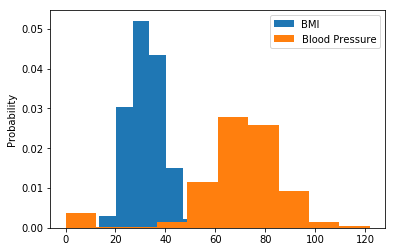

In [36]:
bins = np.linspace(min(df.BMI.min(), df.BloodPressure.min()), max(df.BMI.max(), df.BloodPressure.max(), 50))
plt.hist(df.BMI, label = 'BMI', density = True)
plt.hist(df.BloodPressure, label = 'Blood Pressure', density = True)
plt.legend()
plt.ylabel('Probability')
plt.show()

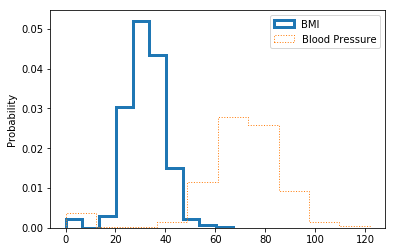

In [37]:
bins = np.linspace(min(df.BMI.min(), df.BloodPressure.min()), max(df.BMI.max(), df.BloodPressure.max(), 50))
plt.hist(df.BMI, label = 'BMI', density = True, histtype = 'step', lw = 3)
plt.hist(df.BloodPressure, label = 'Blood Pressure', density = True, histtype = 'step', ls = ':')
plt.legend()
plt.ylabel('Probability')
plt.show()

## Bee Swarm Plots

In [43]:
df3.head()

,Glucose,BMI,Age,Outcome
0,148,33.6,50,1
1,85,26.6,31,0
2,183,23.3,32,1
3,89,28.1,21,0
4,137,43.1,33,1


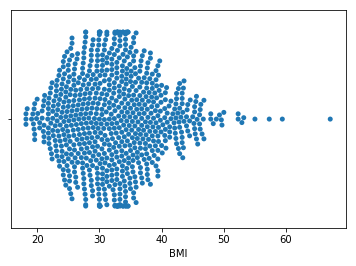

In [44]:
sns.swarmplot(df3.BMI)

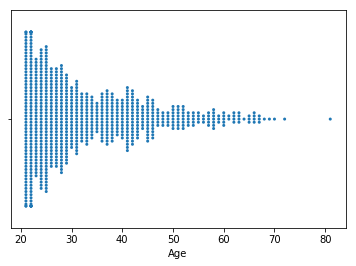

In [51]:
sns.swarmplot(df3.Age, size = 3);

## Box Plots

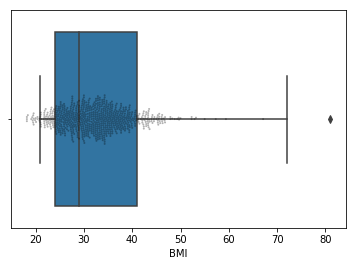

In [66]:
sns.boxplot(x = 'Age', data = df3, whis = 2.0)
sns.swarmplot(df3.BMI, size = 2, color = 'k', alpha = 0.3)

## Violin Plot

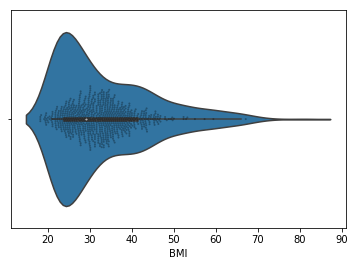

In [68]:
sns.violinplot(x = 'Age', data = df3)
sns.swarmplot(df3.BMI, size = 2, color = 'k', alpha = 0.3)

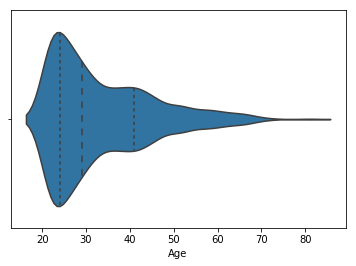

In [72]:
sns.violinplot(x = 'Age', data = df3, inner = 'quartile', bw = 0.2)

## Empirical Cumulative Distribution Functions (CDF) and Pandas Describe

In [ ]:
sdf3 = 